In [116]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

from scipy.signal import savgol_filter


# can be installed using 
# pip install metapredict
# for docs see https://metapredict.readthedocs.io/
import metapredict as meta




In [101]:
import metapredict as meta
import protfasta

human_proteome = protfasta.read_fasta('data/human_proteome_validated.fasta')
PRECOMPUTE = False
OVERWRITE_SAVED = False

In [105]:
if PRECOMPUTE:

    %%time

    cc = []
    for k in human_proteome:
        seq = human_proteome[k]
    
        af2 = meta.predict_confidence(seq)
        dis = meta.predict_disorder(seq)
        cc.append(np.corrcoef(af2,dis)[0][1])    
        
    valid_cc = np.array(cc)[np.isfinite(cc)]
    
    if OVERWRITE_SAVED:
        np.savetxt('data/ppLDDT_vs_dis_cc.csv',valid_cc)

else:
    valid_cc = np.loadtxt('data/ppLDDT_vs_dis_cc.csv')
    
    
print()

In [132]:
np.median(valid_cc)

-0.7842872430515304

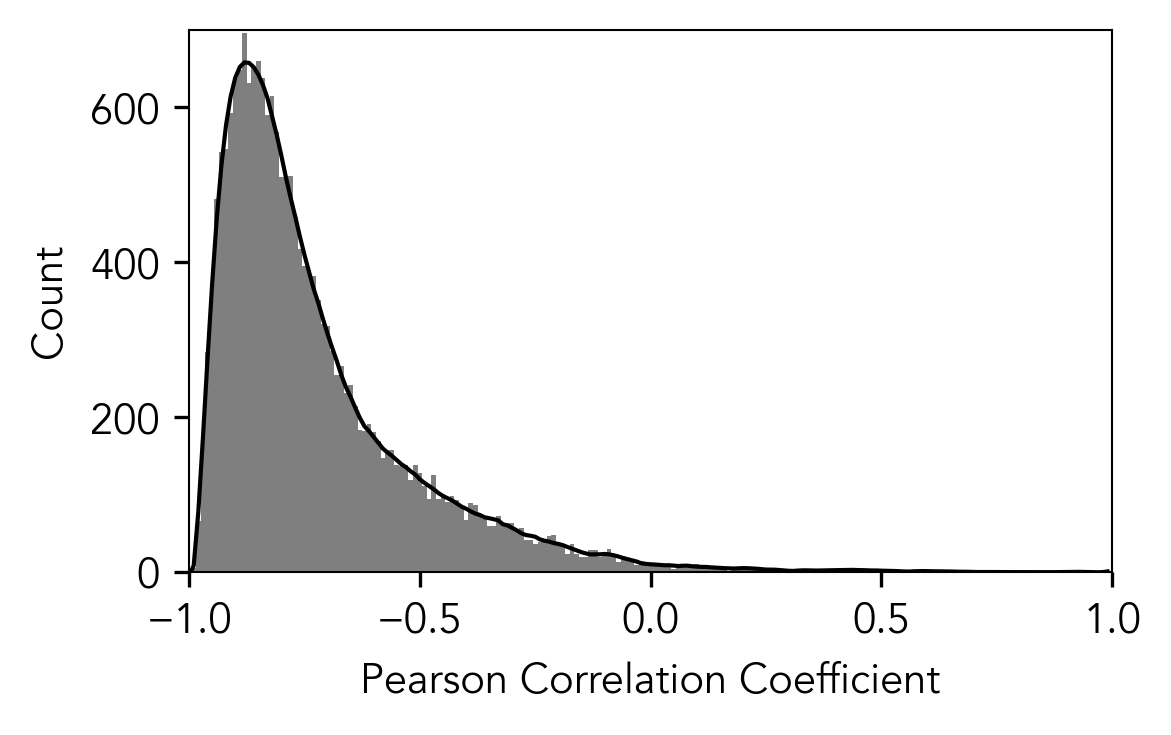

In [128]:
figure(num=None, figsize=(4, 2.6), dpi=150, facecolor='w', edgecolor='k')
ax = plt.gca()

bw = 0.01

hist_vals = np.histogram(valid_cc,np.arange(-1,1+bw, bw))

x = hist_vals[1][:-1]
y = hist_vals[0]

y_hat = savgol_filter(y, 31, 7)

plt.bar(x,y, width=bw, color='k', alpha=0.5)
plt.plot(x,y_hat,'k',linewidth=1)
plt.ylim([0,700])
plt.xlim([-1,1])
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('figures/ppLDDT_vs_disorder.pdf')
